<a href="https://colab.research.google.com/gist/jeremy-descartes/c7887d5786db1463e0340136780732d5/headless-authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install descarteslabs

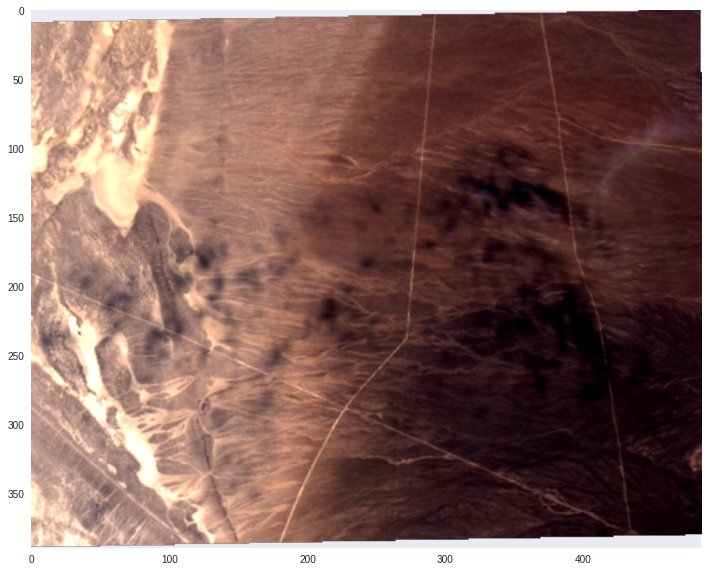

In [2]:
from base64 import b64decode
import json

import descarteslabs as dl

# Get token from
# https://iam.descarteslabs.com/auth/login?refresh_token=true&destination=/auth/refresh_token
# and paste below
s = "Paste token string here"
token_info = json.loads(b64decode(s))
auth = dl.Auth(
  client_secret=token_info["client_secret"], 
  client_id=token_info["client_id"],
  token_info_path=None #<-- this ensures we don't try to write to disk
)


metadata_client = dl.Metadata(auth=auth)
raster_client = dl.Raster(auth=auth)

scenes, ctx = dl.scenes.search(
   aoi={ "type": "Polygon", "coordinates":[[
            [-115.28589248657227, 37.92686760148135],
            [-115.20195007324217, 37.92686760148135],
            [-115.20195007324217, 37.97830379840811],
            [-115.28589248657227, 37.97830379840811],
            [-115.28589248657227, 37.92686760148135]]]
      },
   products="landsat:LC08:01:RT:TOAR",
   raster_client = raster_client,
   metadata_client = metadata_client,
   limit=10
)

dl.scenes.display(scenes.mosaic('red green blue', ctx))